In [194]:
from Dataset import *
from Models import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.metrics import *
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import *
import seaborn as sns
sns.set()


data, training, testing = loader('3425_data.csv', 'Q8a')
training_x = training.drop(columns=['opinionated'])
training_y = training['opinionated']
testing_x = testing.drop(columns=['opinionated'])
testing_y = testing['opinionated']

In [44]:
features = data.drop(columns=['Q8a'])
target = data['Q8a']

In [66]:
features

,Mode,Q1,Q2,Q4,Q5a,Q5f,Q6c,Q7a,Q7c,Q8d,...,p_education_sdc,total_time_taken,neutral_count,disagree_count,agree_count,very_count,just_count,vmj_count,opinionated,undecided_voter
0,2.0,2.0,36.0,3.0,4.0,1.0,4.0,3.0,3.0,5.0,...,2.0,12.100000,3.0,21.0,13.0,7.0,29.0,-22.0,0.0,0.0
1,2.0,2.0,1.0,2.0,4.0,1.0,3.0,3.0,3.0,1.0,...,1.0,12.066667,4.0,18.0,15.0,6.0,30.0,-24.0,0.0,0.0
2,2.0,2.0,13.0,100.0,2.0,1.0,4.0,4.0,3.0,2.0,...,3.0,17.800000,2.0,22.0,13.0,8.0,28.0,-20.0,0.0,0.0
3,2.0,4.0,5.0,-98.0,2.0,2.0,5.0,1.0,1.0,1.0,...,2.0,11.866667,8.0,27.0,19.0,14.0,40.0,-26.0,0.0,1.0
4,1.0,4.0,16.0,100.0,2.0,2.0,1.0,2.0,1.0,4.0,...,2.0,23.100000,3.0,42.0,9.0,6.0,48.0,-42.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,1.0,2.0,34.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,...,3.0,17.683333,9.0,27.0,18.0,17.0,37.0,-20.0,0.0,0.0
2146,2.0,2.0,16.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,14.516667,0.0,26.0,11.0,12.0,24.0,-12.0,0.0,0.0
2147,2.0,2.0,4.0,1.0,2.0,1.0,3.0,3.0,3.0,4.0,...,1.0,11.233333,7.0,38.0,9.0,4.0,50.0,-46.0,0.0,0.0
2148,1.0,3.0,20.0,100.0,4.0,1.0,3.0,1.0,2.0,1.0,...,2.0,14.500000,5.0,25.0,6.0,18.0,18.0,0.0,0.0,0.0


In [73]:
fs = SelectKBest(score_func=f_regression, k=10)
mi = SelectKBest(score_func=mutual_info_regression, k=10)
# apply feature selection
X_selected = mi.fit_transform(features, target)

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    
scores = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[3])

In [74]:
scores

array([-0.32602501, -0.17722631, -0.15918633, -0.19958222, -0.1957573 ])

In [86]:
fr_scores = []

In [87]:
for i in range(32):
    current_score = []
    current_score.append(i+1)
    fs = SelectKBest(score_func=f_regression, k=i+1)

    # apply feature selection
    X_selected = fs.fit_transform(features, target)

    # create a regressor object 
    regressor = DecisionTreeRegressor(random_state = 0)  

    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    
    NMAE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[0])
    ANMAE = -np.mean(NMAE)
    NMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[1])
    ANMSE = -np.mean(NMSE)
    NRMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[2])
    ANRMSE = -np.mean(NRMSE)
    R2 = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[3])
    AR2 = np.mean(R2)
    current_score.append(ANMAE)
    current_score.append(ANMSE)
    current_score.append(ANRMSE)
    current_score.append(AR2)
    fr_scores.append(current_score)

In [89]:
mi_scores = []

In [90]:
for i in range(32):
    current_score = []
    current_score.append(i+1)
    mi = SelectKBest(score_func=mutual_info_regression, k=i+1)
    
    # apply feature selection
    X_selected = mi.fit_transform(features, target)

    # create a regressor object 
    regressor = DecisionTreeRegressor(random_state = 0)  

    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    
    NMAE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[0])
    ANMAE = -np.mean(NMAE)
    NMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[1])
    ANMSE = -np.mean(NMSE)
    NRMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[2])
    ANRMSE = -np.mean(NRMSE)
    R2 = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[3])
    AR2 = np.mean(R2)
    current_score.append(ANMAE)
    current_score.append(ANMSE)
    current_score.append(ANRMSE)
    current_score.append(AR2)
    mi_scores.append(current_score)

In [99]:
fr_frame = pd.DataFrame(fs_scores)
mi_frame = pd.DataFrame(mi_scores)

In [97]:
fr_frame

,0,1,2,3,4
0,1,1.741768,4.598670,2.143226,0.123154
1,2,1.655897,4.176528,2.042235,0.204108
2,3,1.853473,5.420916,2.326420,-0.034051
3,4,1.991762,6.464191,2.541055,-0.232098
4,5,2.230000,8.268530,2.874166,-0.578129
5,6,2.227969,8.243609,2.870289,-0.574447
6,7,2.227442,8.336796,2.886191,-0.592032
7,8,1.971163,6.573488,2.561814,-0.252969
8,9,1.963023,6.753605,2.595923,-0.286825
9,10,1.997674,6.930698,2.630132,-0.320655


In [100]:
mi_frame

,0,1,2,3,4
0,1,1.544608,3.742665,1.933675,0.286597
1,2,1.512257,3.574513,1.889936,0.318390
2,3,1.459387,3.448936,1.856620,0.342180
3,4,1.762384,5.366832,2.315430,-0.023211
4,5,1.587757,4.250435,2.061125,0.187978
5,6,1.870969,5.973705,2.441068,-0.138168
6,7,1.932760,6.364634,2.519669,-0.214363
7,8,1.923023,6.275904,2.503247,-0.195659
8,9,1.939767,6.411744,2.531498,-0.224461
9,10,1.940698,6.349419,2.517802,-0.210112


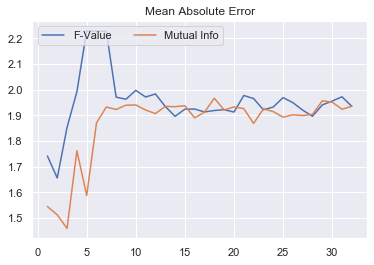

In [105]:
plt.figure()
plt.title('Mean Absolute Error')
plt.plot(fs_frame[0], fs_frame[1])
plt.plot(mi_frame[0], mi_frame[1])
plt.legend(['F-Value', 'Mutual Info'], ncol=2, loc='upper left')

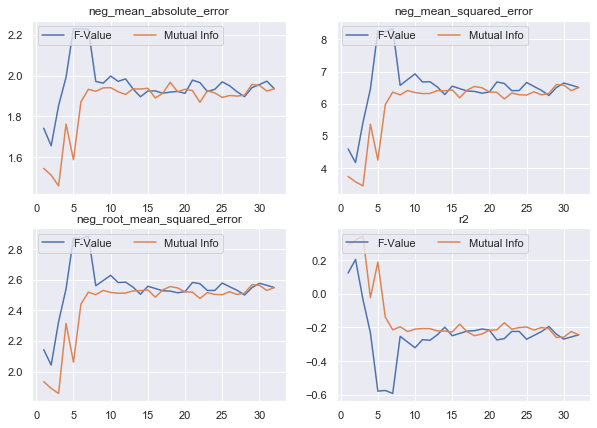

In [109]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    
plt.figure(figsize=(10, 7))
plt.title('Pairwise Clustering')
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(scoring[i])
    plt.plot(fs_frame[0], fs_frame[i+1])
    plt.plot(mi_frame[0], mi_frame[i+1])
    plt.legend(['F-Value', 'Mutual Info'], ncol=2, loc='upper left')

In [110]:
ss = []

In [136]:
mi = SelectKBest(score_func=mutual_info_regression, k=3)
    
# apply feature selection
X_selected = mi.fit_transform(features, target)

# create a regressor object 
regressor = DecisionTreeRegressor(random_state=0)  

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

NMAE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[0])
ANMAE = -np.mean(NMAE)
NMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[1])
ANMSE = -np.mean(NMSE)
NRMSE = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[2])
ANRMSE = -np.mean(NRMSE)
R2 = cross_val_score(regressor, X_selected, target, cv=5, scoring=scoring[3])
AR2 = np.mean(R2)
ss.append(ANMAE)
ss.append(ANMSE)
ss.append(ANRMSE)
ss.append(AR2)

In [112]:
ss

[1.4593866750116995,
 3.4489359362990704,
 1.8566204066571135,
 0.34217980300048656]

In [114]:
features

,Mode,Q1,Q2,Q4,Q5a,Q5f,Q6c,Q7a,Q7c,Q8d,...,p_education_sdc,total_time_taken,neutral_count,disagree_count,agree_count,very_count,just_count,vmj_count,opinionated,undecided_voter
0,2.0,2.0,36.0,3.0,4.0,1.0,4.0,3.0,3.0,5.0,...,2.0,12.100000,3.0,21.0,13.0,7.0,29.0,-22.0,0.0,0.0
1,2.0,2.0,1.0,2.0,4.0,1.0,3.0,3.0,3.0,1.0,...,1.0,12.066667,4.0,18.0,15.0,6.0,30.0,-24.0,0.0,0.0
2,2.0,2.0,13.0,100.0,2.0,1.0,4.0,4.0,3.0,2.0,...,3.0,17.800000,2.0,22.0,13.0,8.0,28.0,-20.0,0.0,0.0
3,2.0,4.0,5.0,-98.0,2.0,2.0,5.0,1.0,1.0,1.0,...,2.0,11.866667,8.0,27.0,19.0,14.0,40.0,-26.0,0.0,1.0
4,1.0,4.0,16.0,100.0,2.0,2.0,1.0,2.0,1.0,4.0,...,2.0,23.100000,3.0,42.0,9.0,6.0,48.0,-42.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,1.0,2.0,34.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,...,3.0,17.683333,9.0,27.0,18.0,17.0,37.0,-20.0,0.0,0.0
2146,2.0,2.0,16.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,14.516667,0.0,26.0,11.0,12.0,24.0,-12.0,0.0,0.0
2147,2.0,2.0,4.0,1.0,2.0,1.0,3.0,3.0,3.0,4.0,...,1.0,11.233333,7.0,38.0,9.0,4.0,50.0,-46.0,0.0,0.0
2148,1.0,3.0,20.0,100.0,4.0,1.0,3.0,1.0,2.0,1.0,...,2.0,14.500000,5.0,25.0,6.0,18.0,18.0,0.0,0.0,0.0


In [225]:
xx = features[['Q6c', 'Q7c', 'Q8d']]

In [226]:
xx.eval('new1=Q6c/(Q8d + 0.01)', inplace=True)
xx.eval('new2=Q7c + Q6c', inplace=True)

Text(0.5, 1, 'Correlation')

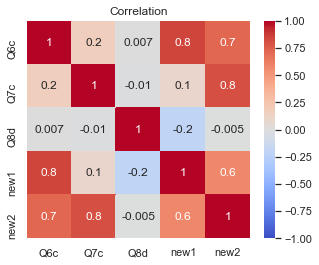

In [227]:
sns.set(rc={'figure.figsize':(5, 4)})
sns.heatmap(xx.corr(), vmin=-1, vmax=1, center= 0, annot = True, fmt='.1g', cmap= 'coolwarm').set_title('Correlation')


In [260]:
criterion = ['friedman_mse', 'mse', 'mae']
splitter = ['best', 'random']
max_depth = [4, 5, 6, 7, 8]
ss = []
for i in max_depth:
    regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=5, random_state=13)  
    NMAE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[0])
    ANMAE = -np.mean(NMAE)
    NMSE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[1])
    ANMSE = -np.mean(NMSE)
    NRMSE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[2])
    ANRMSE = -np.mean(NRMSE)
    R2 = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[3])
    AR2 = np.mean(R2)
    ss.append((i, ANMAE, ANMSE, ANRMSE, AR2))

In [261]:
pd.DataFrame(ss)

,0,1,2,3,4
0,4,1.446101,3.315255,1.819413,0.36847
1,5,1.446101,3.315255,1.819413,0.36847
2,6,1.446101,3.315255,1.819413,0.36847
3,7,1.446101,3.315255,1.819413,0.36847
4,8,1.446101,3.315255,1.819413,0.36847


In [240]:
NMAE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[0])
ANMAE = -np.mean(NMAE)
NMSE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[1])
ANMSE = -np.mean(NMSE)
NRMSE = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[2])
ANRMSE = -np.mean(NRMSE)
R2 = cross_val_score(regressor, xx, target, cv=5, scoring=scoring[3])
AR2 = np.mean(R2)
ss.append((ANMAE, ANMSE, ANRMSE, AR2))
ss

[(1.4578171913767162,
  3.4118355651740138,
  1.8461940367444665,
  0.3497155446422805),
 (1.4600560974824068,
  3.429392953835957,
  1.8510221880934723,
  0.34625617016739374),
 (1.4577527624808917, 3.4113125459455, 1.8461489184791673, 0.3497200331913725),
 (1.4577527624808917, 3.4113125459455, 1.8461489184791673, 0.3497200331913725),
 (1.4568657219664498,
  3.408972565665953,
  1.845447733632242,
  0.35023473607422073)]

In [267]:

ss = [1.4568657219664498,3.408972565665953,
  1.845447733632242,
  0.35023473607422073]
# ss = pd.DataFrame(ss)
# ss.setcolumns = [['MAE', 'MSE', 'RMSE', 'R2']]
# ss.to_latex()
ss

[1.4568657219664498, 3.408972565665953, 1.845447733632242, 0.35023473607422073]

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx, target, test_size=0.2, random_state=42)

In [273]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

[Text(141.24375, 199.32, 'X[4] <= 4.5\nmse = 5.182\nsamples = 1720\nvalue = 5.594'),
 Text(74.4, 163.07999999999998, 'X[2] <= 1.5\nmse = 4.699\nsamples = 700\nvalue = 4.301'),
 Text(37.2, 126.83999999999999, 'X[0] <= 1.5\nmse = 4.751\nsamples = 362\nvalue = 3.613'),
 Text(18.6, 90.6, 'X[1] <= 1.5\nmse = 3.878\nsamples = 132\nvalue = 2.697'),
 Text(9.3, 54.359999999999985, 'X[4] <= -47.5\nmse = 3.395\nsamples = 96\nvalue = 2.354'),
 Text(4.65, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(13.950000000000001, 18.119999999999976, 'mse = 3.412\nsamples = 95\nvalue = 2.368'),
 Text(27.900000000000002, 54.359999999999985, 'X[3] <= -48.02\nmse = 4.015\nsamples = 36\nvalue = 3.611'),
 Text(23.25, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(32.550000000000004, 18.119999999999976, 'mse = 4.073\nsamples = 35\nvalue = 3.571'),
 Text(55.800000000000004, 90.6, 'X[0] <= 2.5\nmse = 4.494\nsamples = 230\nvalue = 4.139'),
 Text(46.5, 54.359999999999985, 'X[4] <=

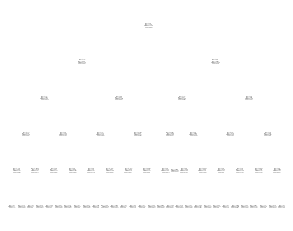

In [275]:
tree.plot_tree(regressor)

In [277]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(regressor, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

In [281]:
import pydotplus
import collections
dot_data = tree.export_graphviz(regressor,
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph

In [282]:
dot_data = tree.export_graphviz(regressor)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

In [283]:
from IPython.display import Image

In [286]:
import pydot